In [8]:
import numpy as np
from tqdm import tqdm
import pandas as pd

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_gammas = pd.read_csv('gammas.csv')
df_gammas['label'] = 1
print(len(df_gammas))
df_protons = pd.read_csv('protons.csv')
df_protons['label'] = 0
print(len(df_protons))
df = df_gammas.append(df_protons).dropna()
df['type'] = preprocessing.LabelEncoder().fit_transform(df.telescope_type_name)

4581
2825


In [10]:
training_features = ['type', 'intensity', 'kurtosis', 'length', 'width', 'skewness']

In [11]:
def train_and_plot(X, y):
    cv = StratifiedKFold(n_splits=4)
    classifier = RandomForestClassifier(n_estimators=100)

    aucs=[]
    for train, test in cv.split(X, y):
        score = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], score[:, 1])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, color='gray')

    print(np.mean(aucs))

0.856783048642


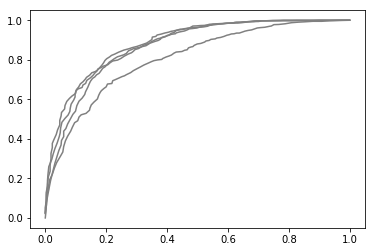

In [12]:
X = df[training_features].values
y = df.label.values
train_and_plot(X, y)

0
0.770508160771
1
0.878627266085
2
0.820823647662


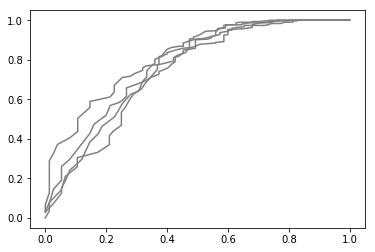

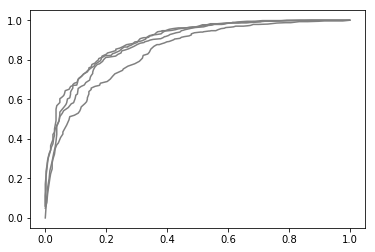

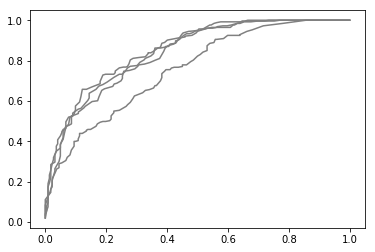

In [13]:
for n, g in df.groupby('type'):
    print(n)
    plt.figure()
    X = g[training_features].values
    y = g.label.values
    train_and_plot(X, y)
    